Accuracy (Linear Kernel): 0.9
Accuracy (RBF Kernel): 0.93
Accuracy (Poly Kernel): 0.79


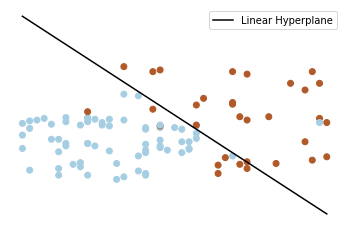

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
X = df.iloc[:, [2, 3]]
Y = df.iloc[:, 4]

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

# Using linear kernel
lin = SVC(kernel='linear', random_state=0).fit(X_train, Y_train)
pred_lin = lin.predict(X_test)

# Using rbf kernel
rbf = SVC(kernel='rbf', random_state=0).fit(X_train, Y_train)
pred_rbf = rbf.predict(X_test)

# Using poly kernel
poly = SVC(kernel='poly', degree=4).fit(X_train, Y_train)
pred_poly = poly.predict(X_test)

# Accuracy
print("Accuracy (Linear Kernel):", accuracy_score(Y_test, pred_lin))
print("Accuracy (RBF Kernel):", accuracy_score(Y_test, pred_rbf))
print("Accuracy (Poly Kernel):", accuracy_score(Y_test, pred_poly))

# Scatter plot and linear hyperplane
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.Paired)
w = lin.coef_[0]
a, b = -w[0] / w[1], lin.intercept_[0] / w[1]
xx = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
yy = a * xx - b

# Plot the linear hyperplane
plt.plot(xx, yy, label='Linear Hyperplane', c='k')
plt.legend()
plt.axis("off")
plt.show()
